## Importing libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

## Predict Phishing Web Page Using Decision Tree

Phishing is a method of trying to gather personal information using deceptive e-mails and websites.

In this notebook, we will read the data and look at what are the features that can give us information on what are the attributes of a phishing website, the apply decision tree model to predict the result

## Loading dataset

In [5]:
ml = pd.read_csv('https://raw.githubusercontent.com/khuynh22/Phishing-Detection/main/Phishing_Legitimate_full.csv')

##Viewing the data

In [6]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [7]:
ml.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


## Taking unique values


Computes the number of unique elements in each column of the DataFrame 'ml', sorts the resulting Series in ascending order of unique values, resets the index, and creates a new DataFrame 'unique' that contains the sorted and indexed Series of unique values.

In [9]:
unique = ml.nunique().sort_values(ascending=True).reset_index()
unique

,index,0
0,HttpsInHostname,1
1,DoubleSlashInPath,2
2,EmbeddedBrandName,2
3,ExtFavicon,2
4,InsecureForms,2
5,RelativeFormAction,2
6,ExtFormAction,2
7,AbnormalFormAction,2
8,FrequentDomainNameMismatch,2
9,FakeLinkInStatusBar,2


##Taking data for modeling and prediction


Separate data into data for building model, and data for prediction

In [13]:
data = ml.sample(frac = 0.8, random_state=42)
data_unseen = ml.drop(data.index)
data.reset_index(inplace = True, drop = True)

In [14]:
data_unseen.reset_index(inplace = True, drop = True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (8000, 50)


In [15]:
#similar with above for unseen data for predictions
print('Data for Prediction: ' + str(data_unseen.shape))

Data for Prediction: (2000, 50)


Put data into training and testing data

In [16]:
X_train = data.iloc[:,1:-1]
y_train = data.iloc[:,-1]
X_test = data_unseen.iloc[:, 1:-1]
y_test = data_unseen.iloc[:,-1]

## Classification Tree

Building classification tree using Gini index

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Plot the decision tree model

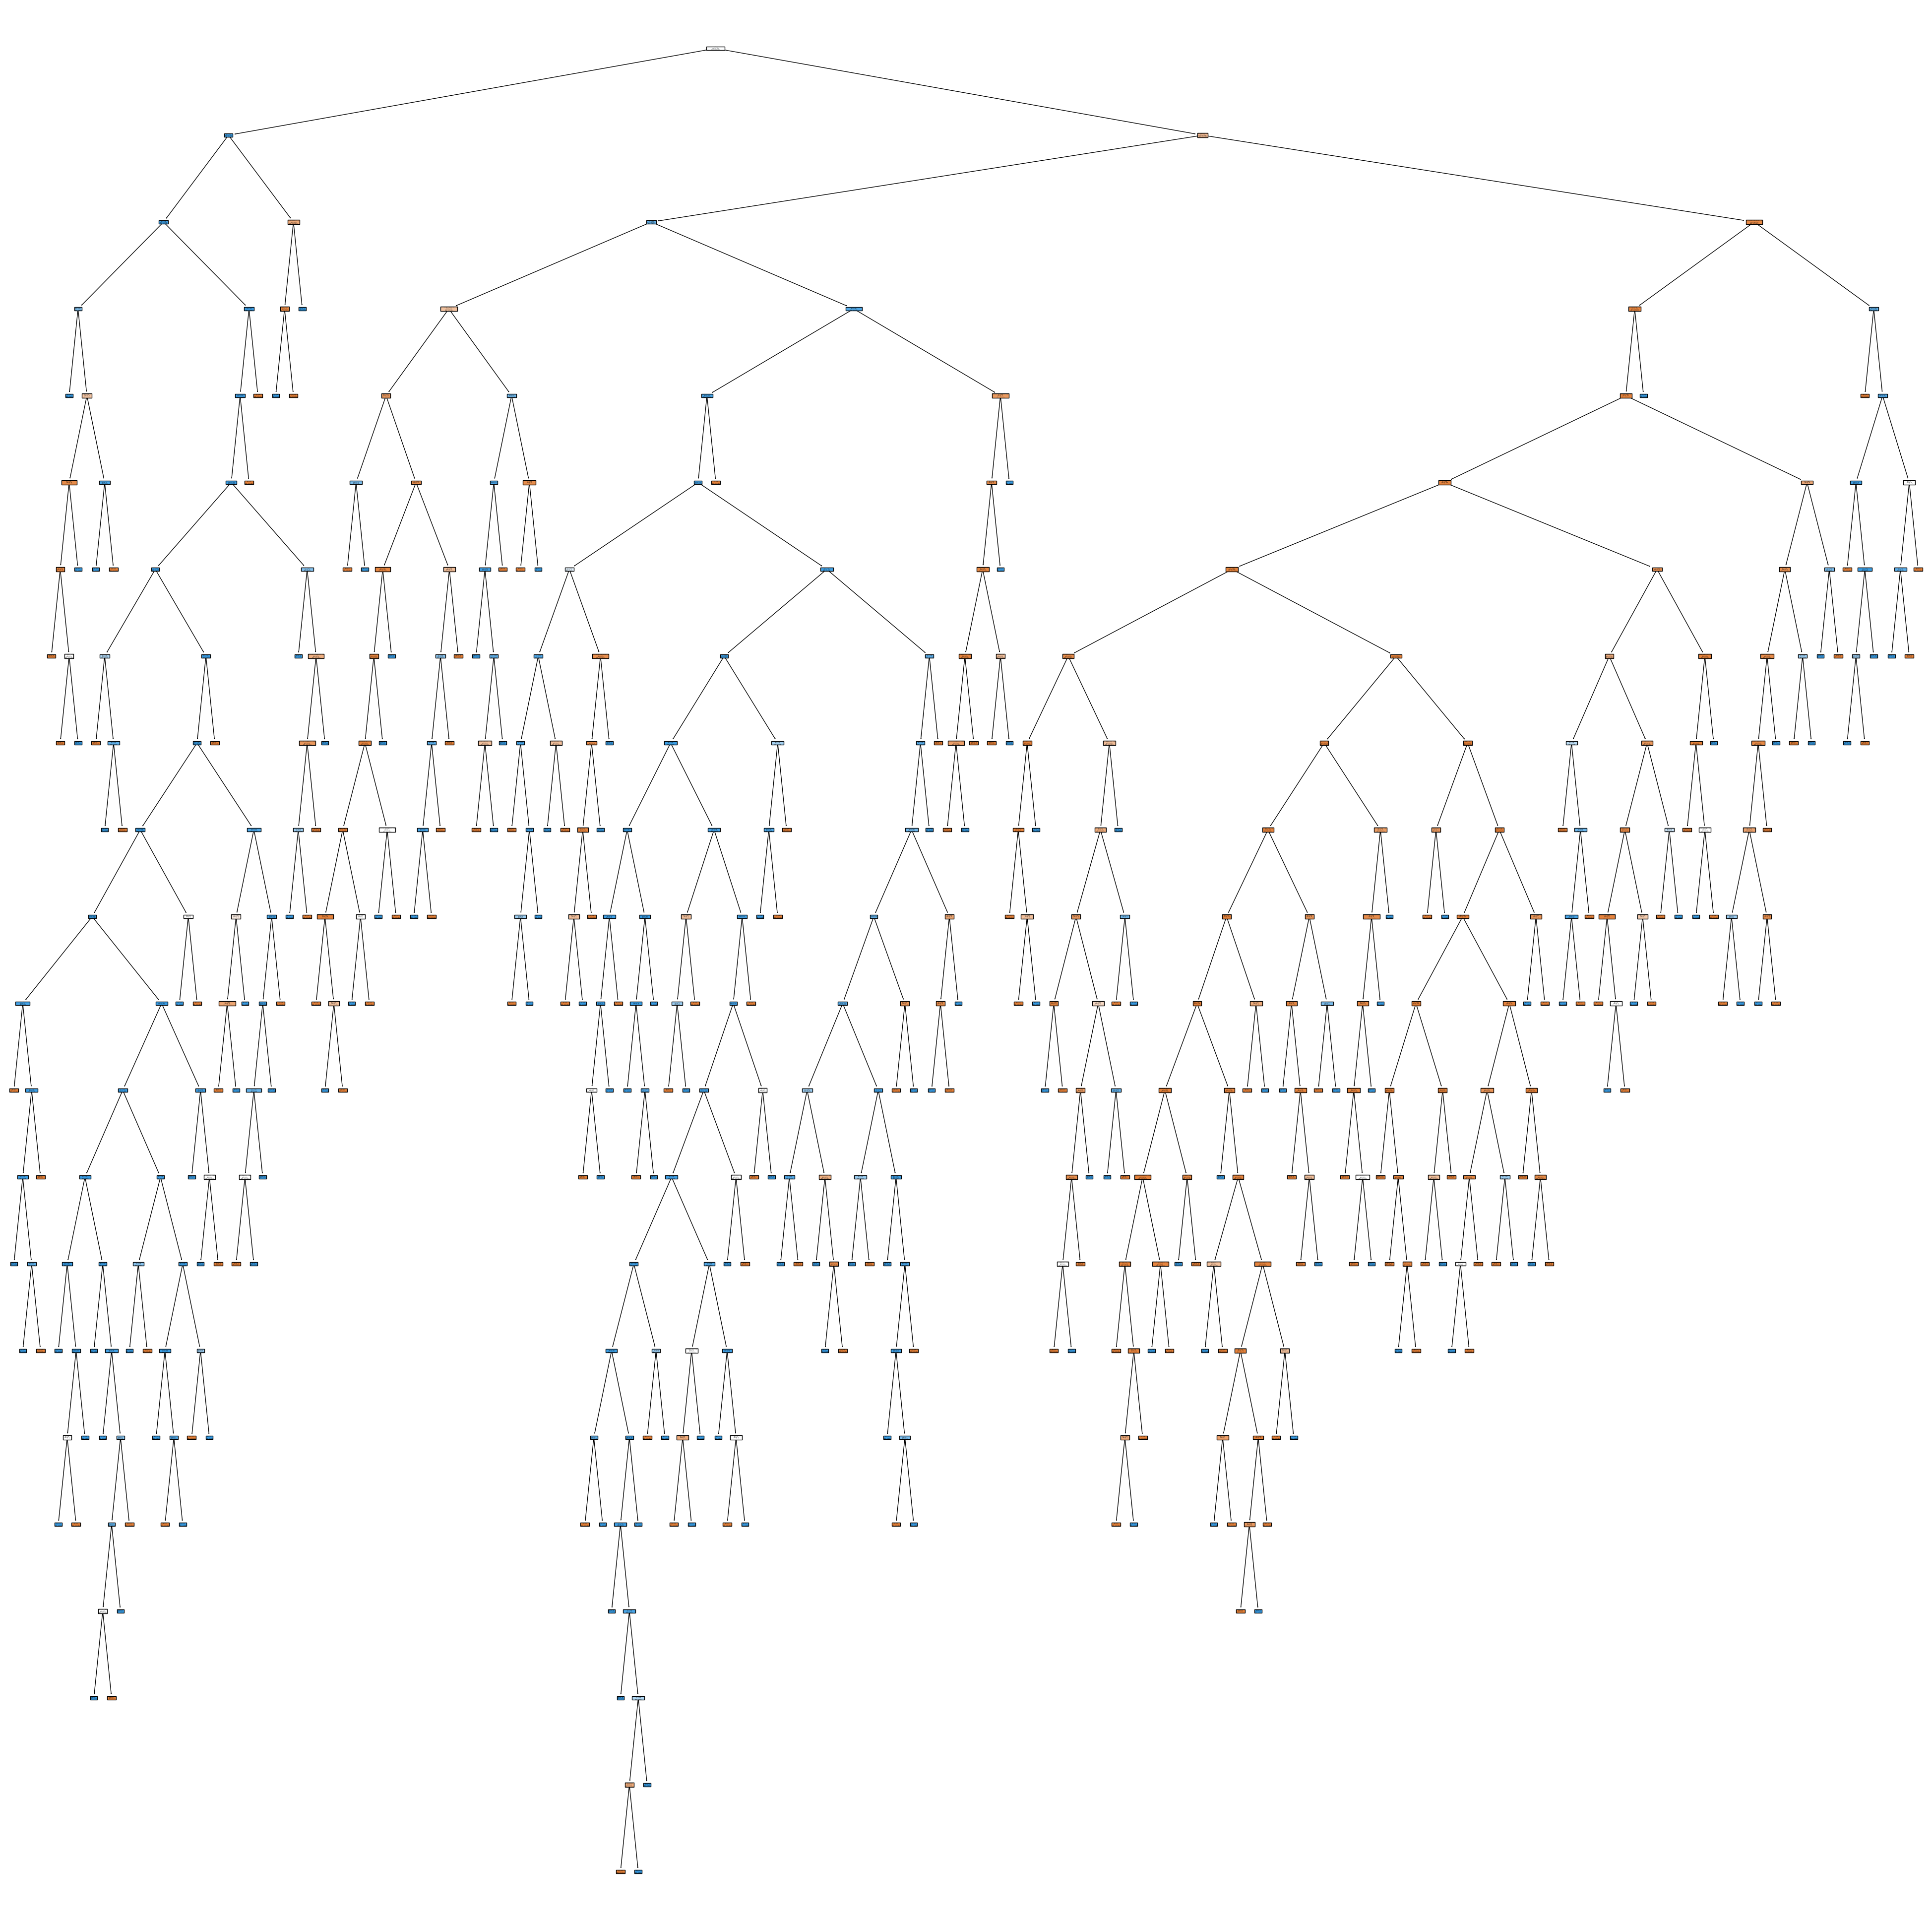

In [19]:
plt.figure(figsize = (50, 50))
features = X_train.columns
classes = ['Not Phishing', 'Phishing']
tree.plot_tree(clf, feature_names = features, class_names = classes, filled = True)
plt.show()

In [20]:
y_pred = clf.predict(X_test)

In [21]:
classes = ['Not Phishing', 'Phishing']
def plot_confusionMatrix(y_train_pred, y_train, dom):
  print(f'{dom} Confusion matrix')
  cf = confusion_matrix(y_train_pred, y_train)
  sns.heatmap(cf, annot = True, yticklabels= classes, xticklabels= classes, cmap= 'Blues', fmt= 'g')
  plt.tight_layout()
  plt.show()

Train score: 1.0
Test score: 0.969
Train Confusion matrix


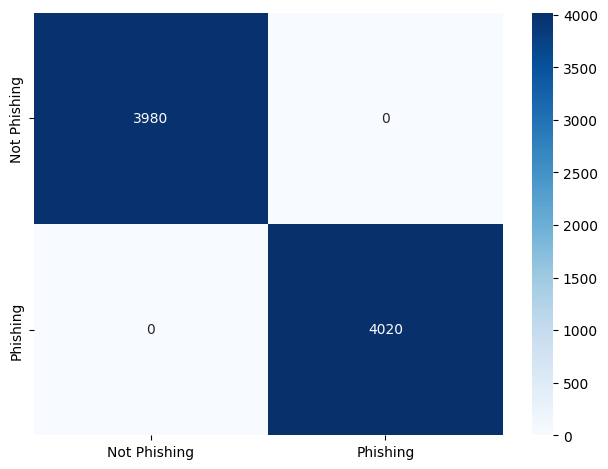

Test Confusion matrix


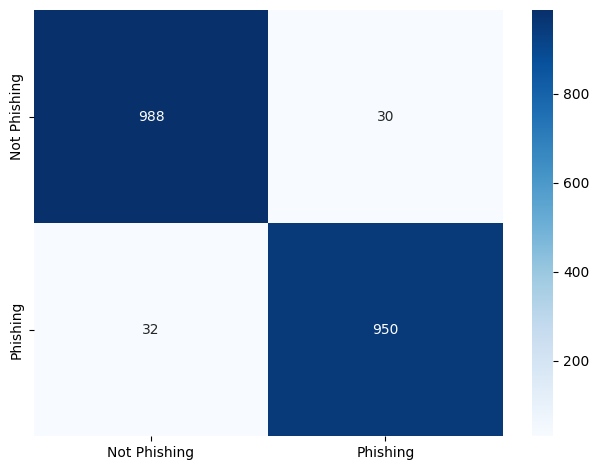

In [23]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(f'Train score: {accuracy_score(y_train_pred, y_train)}')
print(f'Test score: {accuracy_score(y_test_pred, y_test)}')
plot_confusionMatrix(y_train_pred, y_train, 'Train')
plot_confusionMatrix(y_test_pred, y_test, 'Test')

#Prune Tree
Removing impurities data from the dataset to find valuable branches for tree pruning. Tree pruning reduces the model's size, enhances its functionality, and prevents overfitting.

In [24]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [25]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

Cutting branches process

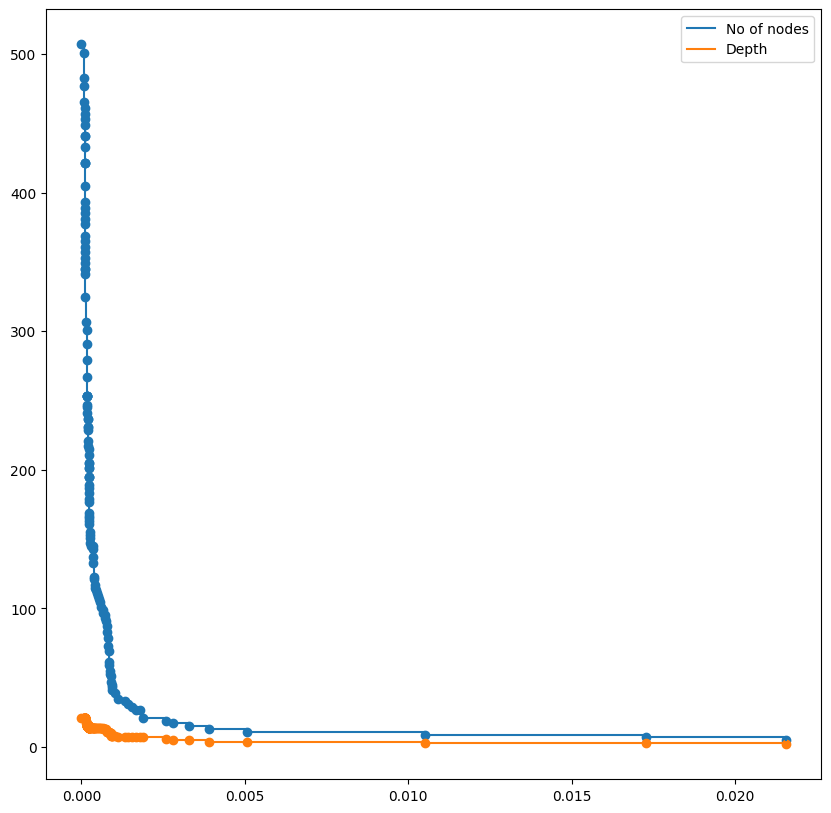

In [26]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize = (10, 10))
plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)
plt.plot(ccp_alphas, node_counts, label = 'No of nodes', drawstyle = 'steps-post')
plt.plot(ccp_alphas, depth, label = 'Depth', drawstyle = 'steps-post')
plt.legend()
plt.show()

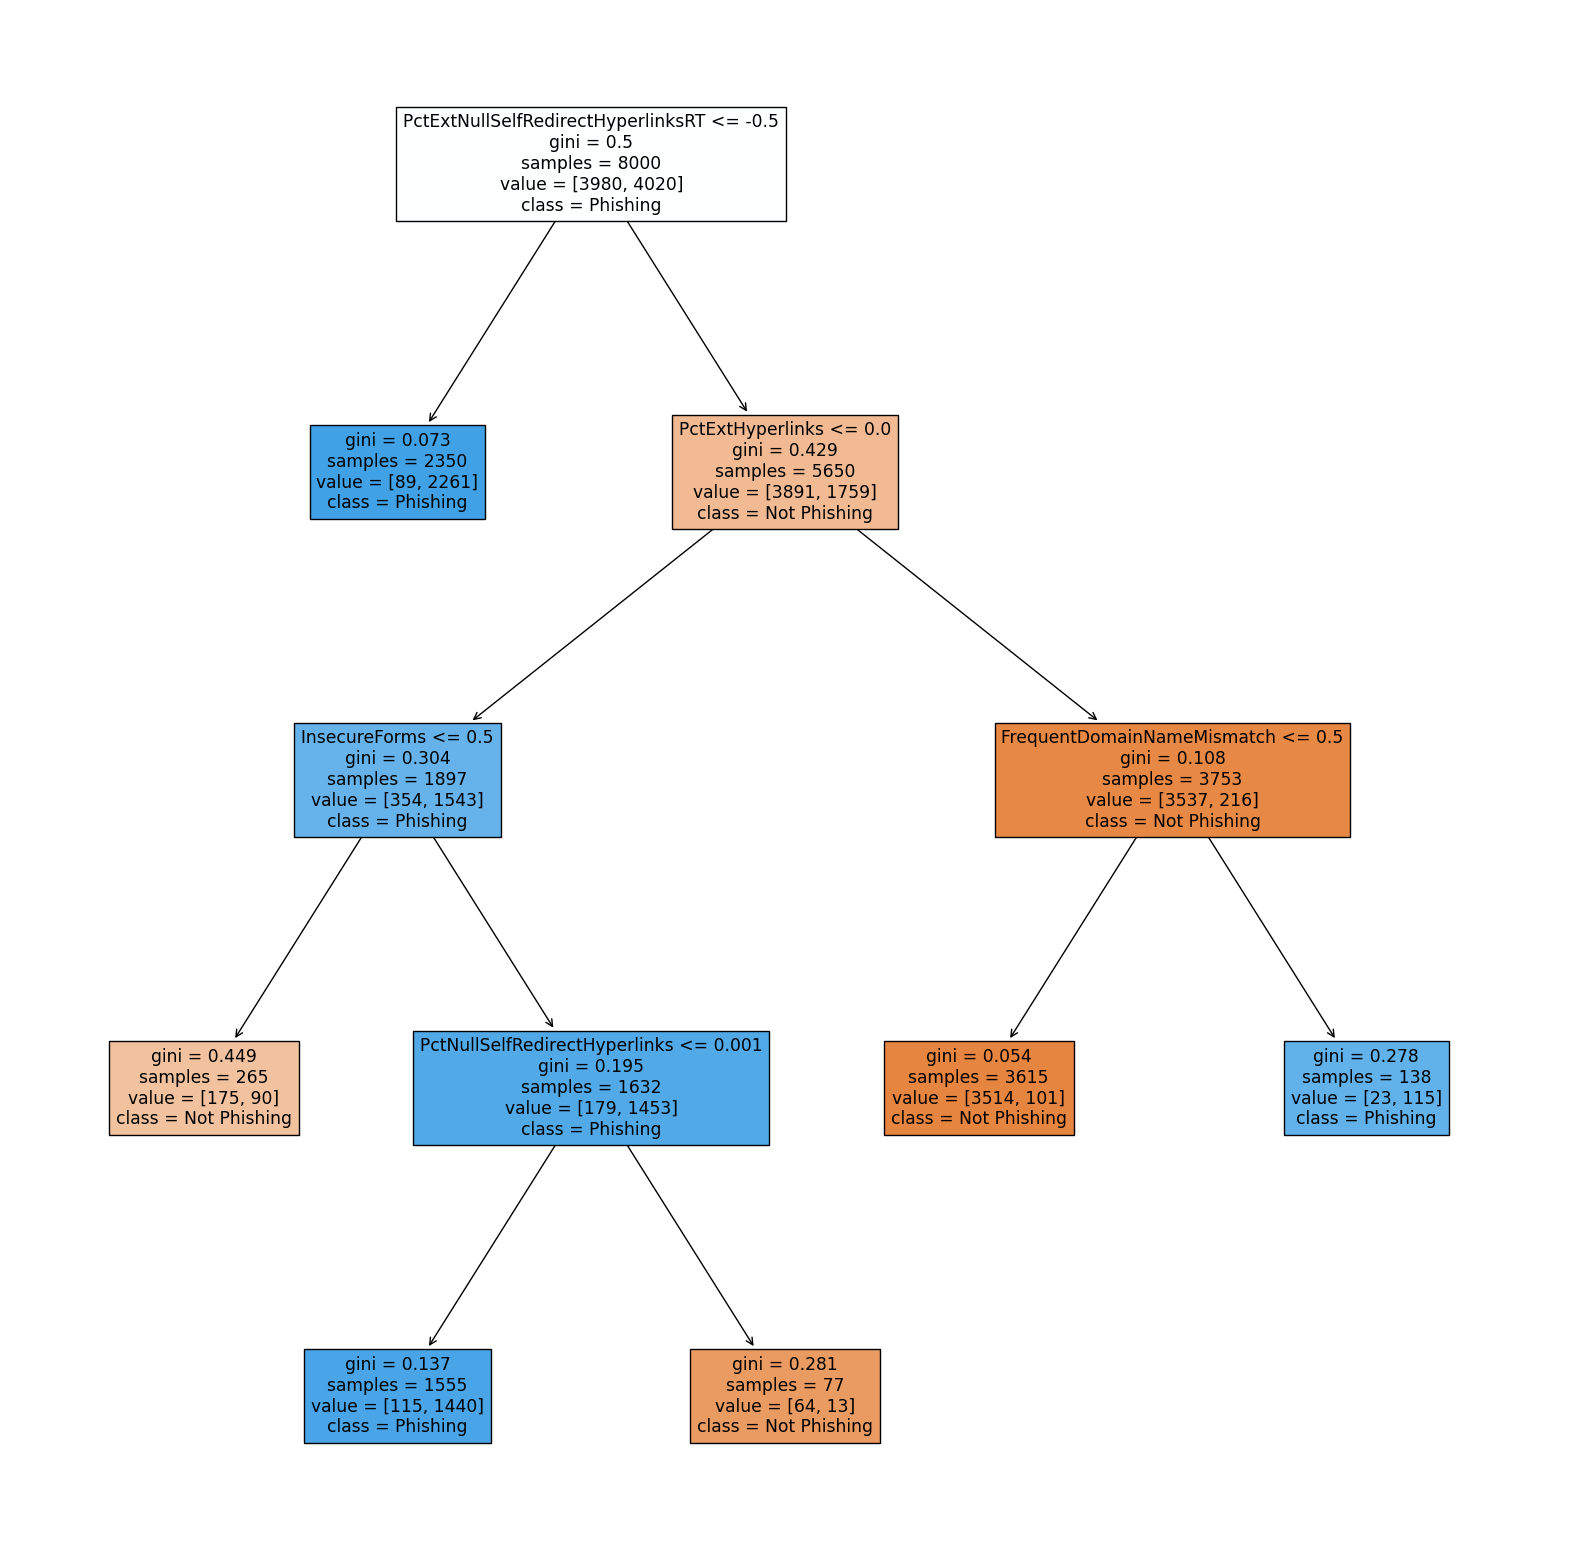

In [27]:
clf_ = tree.DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.01)
clf_.fit(X_train , y_train)
plt.figure(figsize = (20,20))
features = X_train.columns
tree.plot_tree(clf_, feature_names = features, class_names = classes, filled = True)
plt.show()

Graph between accuracy and alpha

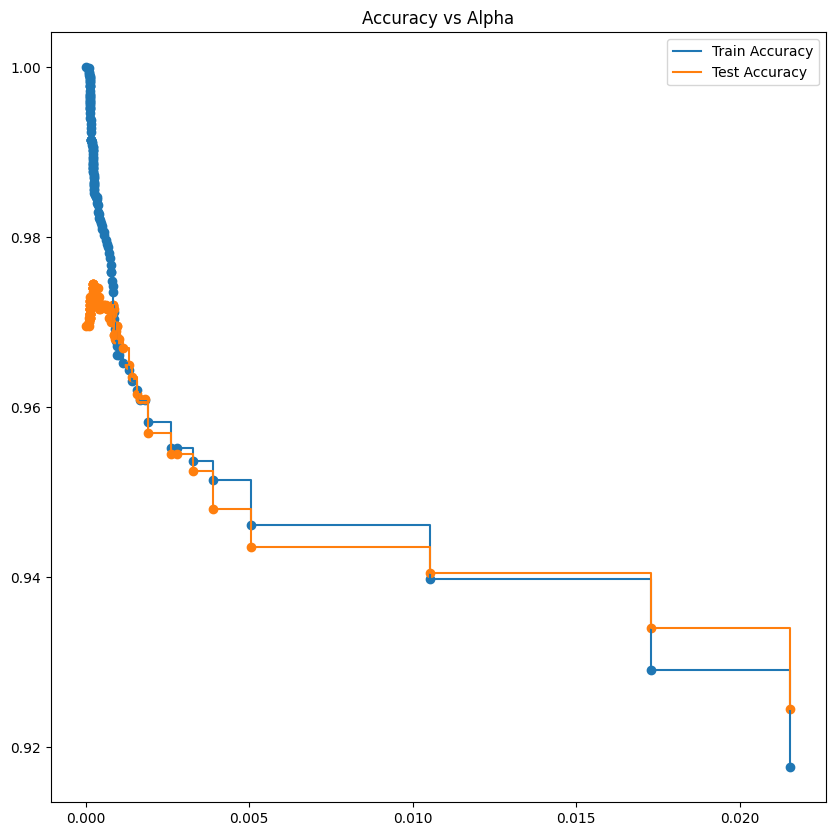

In [28]:
train_acc = []
test_acc = []
for c in clfs:
  y_train_pred = c.predict(X_train)
  y_test_pred = c.predict(X_test)
  train_acc.append(accuracy_score(y_train, y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize = (10, 10))
plt.scatter(ccp_alphas, train_acc)
plt.scatter(ccp_alphas, test_acc)
plt.plot(ccp_alphas, train_acc, label = 'Train Accuracy', drawstyle = 'steps-post')
plt.plot(ccp_alphas, test_acc, label = 'Test Accuracy', drawstyle = 'steps-post')
plt.legend()
plt.title('Accuracy vs Alpha')
plt.show()

# Confusion Matrix

Train score0.946125
Test score0.9435
Train Confusion matrix


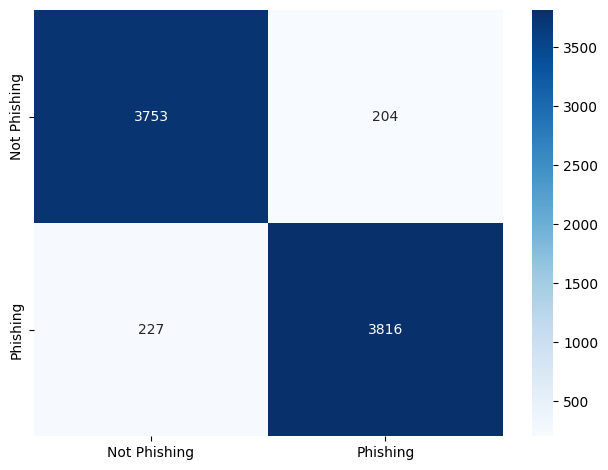

Test Confusion matrix


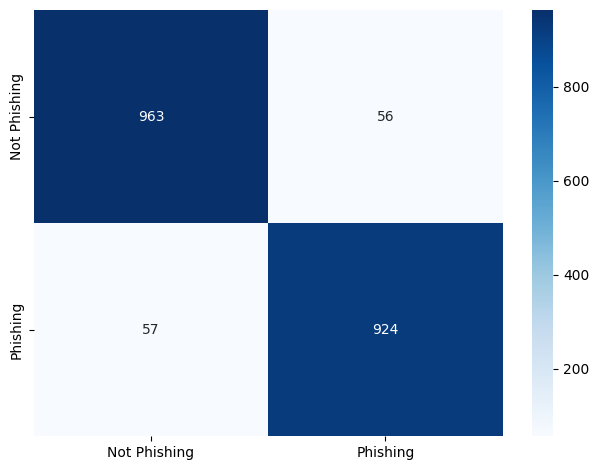

In [29]:
#choose alpha = 0.010
clf_ = tree.DecisionTreeClassifier(random_state=0, ccp_alpha = 0.010)
clf_.fit(X_train, y_train)

y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)
print(f'Train score{accuracy_score(y_train_pred, y_train)}')
print(f'Test score{accuracy_score(y_test_pred, y_test)}')
plot_confusionMatrix(y_train_pred, y_train, 'Train')
plot_confusionMatrix(y_test_pred, y_test, 'Test')

In [ ]:
sns.lineplot(x = 'num_of_features', y = 'precision', data = df, label = 'Precision Score')
sns.lineplot(x = 'num_of_features', y = 'recall', data = df, label = 'Recall Score')
sns.lineplot(x = 'num_of_features', y = 'f1_score', data = df, label = 'F1 Score')
sns.lineplot(x = 'num_of_features', y = 'accuracy', data = df, label = 'Accuracy Score')

# Classification Model Training Report

In [30]:
from sklearn.metrics import classification_report
print(f'Train classification report \n {classification_report(y_train, y_train_pred, target_names = classes)}')
print(f'\n Test classification report \n {classification_report(y_test_pred, y_test, target_names = classes)}')

Train classification report 
               precision    recall  f1-score   support

Not Phishing       0.95      0.94      0.95      3980
    Phishing       0.94      0.95      0.95      4020

    accuracy                           0.95      8000
   macro avg       0.95      0.95      0.95      8000
weighted avg       0.95      0.95      0.95      8000


 Test classification report 
               precision    recall  f1-score   support

Not Phishing       0.94      0.95      0.94      1019
    Phishing       0.94      0.94      0.94       981

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

